## Correlation plots for the input features

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import tqdm

In [2]:
df_list=[]
for filenumber in tqdm.tqdm(range(1,37)):
# Open the .root file
    filePath=f'../36_files/JetNtuple_RunIISummer16_13TeV_MC_{filenumber}.root'
    file = uproot.open(filePath)
# Access the tree structure
    tree = file['AK4jets/jetTree']
# Define the columns you want to read
    columns = ['isPhysG', 'isPhysUDS','QG_mult','QG_ptD','QG_axis2','jetPt','jetEta','jetQGl','jetMass','jetGirth','jetArea','jetChargedHadronMult','jetNeutralHadronMult','jetChargedMult','jetNeutralMult']
    df=tree.arrays(columns, library='pd')
    df_list.append(df)

100%|██████████| 36/36 [00:06<00:00,  5.72it/s]


In [3]:
df=pd.concat(df_list,ignore_index='true')

Number of input variable combinations =  105


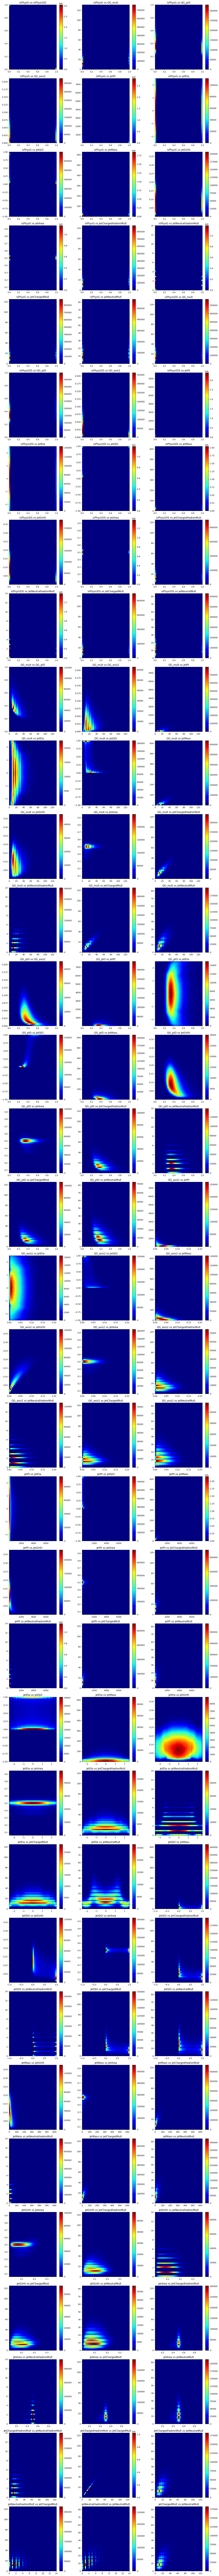

In [4]:
import pandas as pdgaussian 
import matplotlib.pyplot as plt
import itertools
import math

columns = ['isPhysG', 'isPhysUDS','QG_mult','QG_ptD','QG_axis2','jetPt','jetEta','jetQGl','jetMass','jetGirth','jetArea','jetChargedHadronMult','jetNeutralHadronMult','jetChargedMult','jetNeutralMult']

combinations = list(itertools.combinations(columns, 2))

# Calculate the number of rows needed for the subplots
n = len(combinations)
print("Number of input variable combinations = ",n)
rows = math.ceil(n / 3)

# Create a subplot for each combination
fig, axs = plt.subplots(rows, 3, figsize=(15, rows*5))
axs = axs.flatten()  # Flatten the array of axes to make it easier to iterate over

for ax, (col1, col2) in zip(axs, combinations):
    h = ax.hist2d(df[col1], df[col2], bins=(50, 50), cmap=plt.cm.jet)
    ax.set_title(f'{col1} vs {col2}')
    fig.colorbar(h[3], ax=ax)

# Remove any unused subplots
# for i in range(n, rows*3):
#     fig.delaxes(axs[i])

plt.tight_layout()
plt.show()
# plt.savefig("2d_hist.pdf")

